# A simulation of population 
## Simulation of a pedigree
This is a very simple simulation.  Only two parameters are required:
- $N_{\text{ID}}$ of each generration
- $N_{\text{generations}}$

The function will sample half of the ID in each generation as sires, and the rest as dams.  Each pair will have two offspring.

**Note:**
- The founder generation is deemed as generation **0**

In [2]:
# if PlayGround is not installed, run below
# using Pkg
# Pkg.add("https://github.com/xijiang/PlayGround.jl")
# or,
# ]
# add https://github.com/xijiang/PlayGround.jl
import PlayGround: simu_u_ped, simu_bv_p

nid, ngn = 10, 2
ped = simu_u_ped(nid, ngn)

30-element Array{PlayGround.PM,1}:
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(0, 0)
 PlayGround.PM(9, 2)
 PlayGround.PM(9, 2)
 PlayGround.PM(8, 1)
 ⋮
 PlayGround.PM(3, 6)
 PlayGround.PM(3, 6)
 PlayGround.PM(13, 20)
 PlayGround.PM(13, 20)
 PlayGround.PM(14, 11)
 PlayGround.PM(14, 11)
 PlayGround.PM(18, 16)
 PlayGround.PM(18, 16)
 PlayGround.PM(19, 15)
 PlayGround.PM(19, 15)
 PlayGround.PM(12, 17)
 PlayGround.PM(12, 17)

## Breeding value and phenotype simulation with pedigree only
### Parameter required:
- $h^2 \in [0, 1]$
- $V_p \in (0, \infty)$
- Pedigree, e.g., see above
- $\mu$, by default, 0.0

### The model and algorithm used for breeding value and phenotype
The phenotype $P = A_s + M_s + A_d + M_d + E$, where $A$ is for additive effect, $M$ is for Medelian sampling error, $_s$ for sire and $_d$ for dam.

$E \sim N(0, V_p(1-h^2)$
$A_p \sim N(0, V_ph^2/2)$ 

For each offspring, when its parent $_p$, either sire or dam, is known, then $A_p/2 + M_p$ are added to the offspring's breeding value. 

In [3]:
h2, vp = 0.8, 1.
bv, y = simu_bv_p(h2, vp, ped)
# simu_bv_p(h2, vp, ped, μ = 3.) # if to simulate a non-zero μ

([-0.4378850989505314, 0.3433843162369005, -0.4027297552480735, -0.17367067699208283, 0.1703274072395936, 0.10341186226898147, -2.5076193693625664, -0.6450916484921927, 0.3544209709927647, -2.097775412325318  …  -0.22579657169681655, 0.47169164020494486, -1.0124224093513434, 0.39686302617030605, -0.3470736897947297, 0.07676821244693205, -0.11733615453720353, 1.3706331671343936, -0.19033744524919705, 0.09075893933833984], [-0.8076717875577504, 0.49292386479490446, -0.602949909989012, -0.6982562266758712, -0.23205374314479693, 0.5551307360020106, -2.3845625149847574, -0.7899306916255493, 0.1338531407568748, -2.2335339648834407  …  -0.22607352694346272, 0.9693150959209297, -0.5783390553337342, 0.6373695274196182, 0.1758497134898776, -0.4252479799884195, 0.08665355342340614, 0.8495372880954007, -0.3406352208985204, 0.2733178153792216])

### Some quick properties of such propulations
#### Realized parameters
If we take a large $N_{\text{ID}}$, then the estimates should be very close to the parameters we set.

In [4]:
using Statistics
nid, ngn, h2, vp = 1000, 1, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
# Variances in generation 0
vt0 = var(bv[1:nid])
vy0 = var(y[1:nid])
println(join([vt0, vy0, vt0/vy0], '\n'))

0.8165971698078247
1.0087490849134366
0.8095146573321541


We can see that the realized parameters $V_p\approx 1.01$, $h2\approx 0.83$ are close to 1.0, and 0.8.  These result are not bad.

#### Is there a trend in the $V_p$ and $h^2$ across generations.
Let's simulate 100 generations. Three scenarios of $N_{\text{ID}}$ = [1000, 50, 10] are simulated below.

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


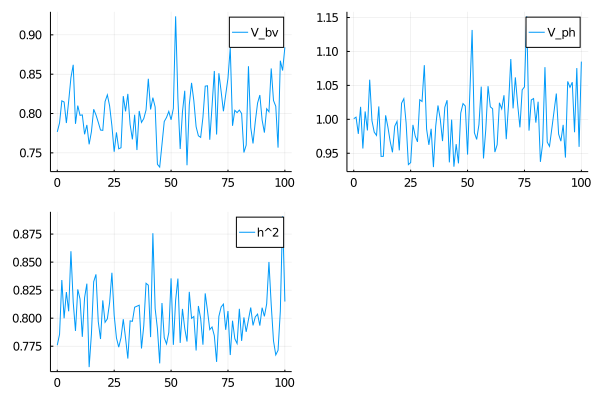

In [5]:
using Plots
nid, ngn, h2, vp = 1000, 100, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
vb = Float64[]
vy = Float64[]
for g in 0:ngn
    start = g * nid
    push!(vb, var(bv[start+1:start+nid]))
    push!(vy, var(y[start+1:start+nid]))
end
eh2 =  vb./vy

gbv = plot(0:ngn, vb, label="V_bv")
gph = plot(0:ngn, vy, label="V_ph")
gh2 = plot(0:ngn, eh2, label="h^2")
plot(gbv, gph, gh2)

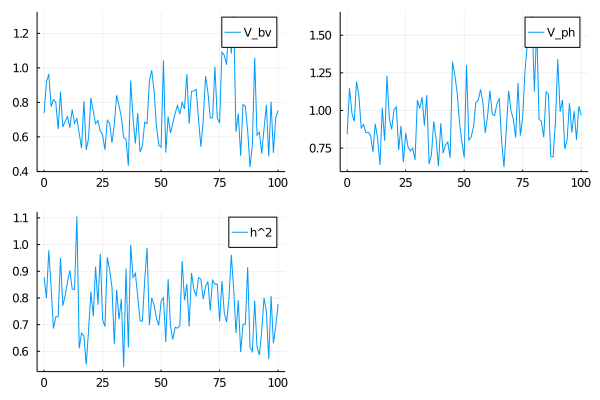

In [6]:
nid, ngn, h2, vp = 50, 100, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
vb = Float64[]
vy = Float64[]
for g in 0:ngn
    start = g * nid
    push!(vb, var(bv[start+1:start+nid]))
    push!(vy, var(y[start+1:start+nid]))
end
eh2 =  vb./vy

gbv = plot(0:ngn, vb, label="V_bv")
gph = plot(0:ngn, vy, label="V_ph")
gh2 = plot(0:ngn, eh2, label="h^2")
plot(gbv, gph, gh2)

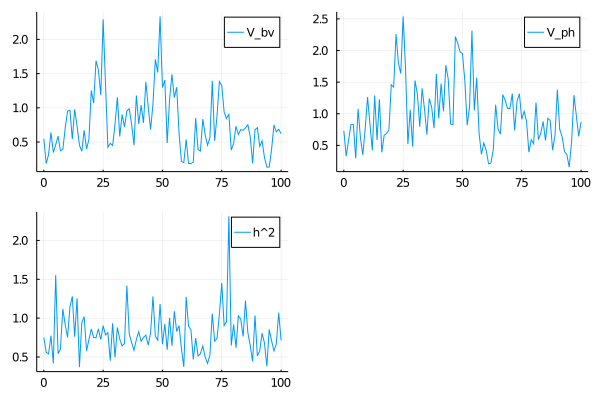

In [7]:
nid, ngn, h2, vp = 10, 100, 0.8, 1.
ped = simu_u_ped(nid, ngn)
bv, y = simu_bv_p(h2, vp, ped)
vb = Float64[]
vy = Float64[]
for g in 0:ngn
    start = g * nid
    push!(vb, var(bv[start+1:start+nid]))
    push!(vy, var(y[start+1:start+nid]))
end
eh2 =  vb./vy

gbv = plot(0:ngn, vb, label="V_bv")
gph = plot(0:ngn, vy, label="V_ph")
gh2 = plot(0:ngn, eh2, label="h^2")
plot(gbv, gph, gh2)

## Simulation BV+P with QTL and a pedigree
The above simulation assumes a constant Mendelian sampling error, which is not the case, especially when the population size of each generation is small.  To simulate with QTL can avoid such problem.

### The algorithm
#### Genotype simulation
1. Simulate a pedigree as above
   - Assume each ID has two offspring
   - Random mating for the ID
2. QTL allele frequencies
   - Typically, the frequencies follow a U-shaped distribution
   - Many univariate distributions have a U-shape, for example
     - Arcsine distribution, $f(x) = \frac{1}{\pi\sqrt{x(1-x))}}$
     - Beta distribution, e.g., $\beta(0.5, 0.5)$
   - I sample allele frequencies for generation 0 from $\beta(0.25, 0.25)$, with MAF = 0.01.
3. Generation 1 and on will have alleles dropped from generation 0 and through.

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


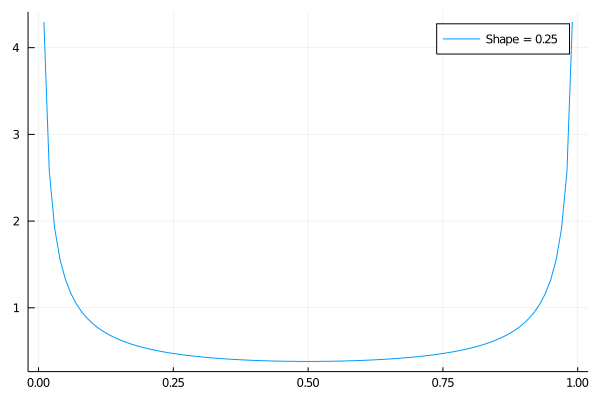

In [8]:
# An example of β(0.25) distribution
using StatsPlots, Distributions
plot(0.01:0.01:0.99, Beta(0.25), label="Shape = 0.25")

#### Breeding and phenotype values
1. QTL effect $e_{\text{QTL}}\stackrel{iid}{\sim}N(0, V_{\text{i}_{\text{QTL}}})$, which can also be adjusted.
2. $\text{BV}_i = G_i'e_{\text{QTL}}$.

$V_{\text{BV}}$ obviously increases monotonically as $V_{\text{i}_{\text{QTL}}}$ increases.  For example:

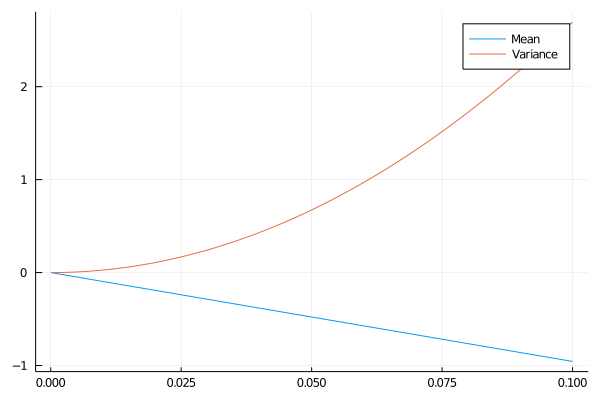

In [9]:
nid = nqtl = 1000
shp = 0.25                  # shape
MAF = 0.01

freq = Float64[]            # pop frequency of (MAF, 1-MAF), exclusive                                                                                                                        
while length(freq) < nqtl   # sizeof is equivalent to capacity in C++                                                                                                                         
    f = rand(Beta(shp))
    MAF < f < 1-MAF && push!(freq, f)
end

# sample QTL genotypes                                                                                                                                                                        
qg = begin
    tmp = Bool[]
    for i in 1:nqtl
        append!(tmp, rand(Bernoulli(freq[i]), 2nid))
    end
    reshape(tmp, 2nid, :)
end

# sample QTL effects                                                                                                                                                                          
gt = begin              # convert allele types to 012 genotypes                                                                                                                               
    tmp = Float64[]
    for i in 1:2:2nid
        append!(tmp, convert.(Float64, qg[i, :] .+ qg[i+1, :]))
    end
    reshape(tmp, nid, :)
end

step = .1/nqtl
steps = step:step:0.1

eqtl = randn(nqtl)
mu, vbv = begin
    m = Float64[]
    tmp = Float64[]
    for f in steps
        e = eqtl .* f
        bv = gt * e
        push!(m, mean(bv))
        push!(tmp, var(bv))
    end
    m, tmp
end
plot(steps, m, label="Mean")
plot!(steps, vbv, label="Variance")

AutoI guess:
1. The 
It is then easy to find a factor to scale eQTL, so that $V_{\text{BV}}=h^2$.  Adding a noice of $N(0, 1-h^2)$ will create phenotypes $\sim N(\mu, 1.0)$.  From above, we can also see that the population mean is linearly increasing or decreasing to the scale factor.  Hence we can also easily adjust eQTL so that the mean phenotype is about 0.0.

#### Other considerations
1. LD should be considered in the future.
2. There are a lot of factors, but different scenarios may result in similar populations.

## Variance component estimation
The breeding values can't be observed in reality.  They have to be estimated.  Hence the variances of breeding values and errors have to be estimated.

Below is an estimation procedure using Echidna.  This software is an ASReml equivalent.  One can also use it for commercial analysis if (s)he has a license for ASReml.